# Clustering yeast proteins based on their function

* 1,484 samples, 8 features (e.g., protein localization sites)
* Dataset Link: https://archive.ics.uci.edu/dataset/110/yeast

## Step 1: Load the dataset

In [1]:
yeast_df <- read.table("/kaggle/input/clustering-datasets/7-yeast-dataset/yeast/yeast.data")

In [2]:
summary(yeast_df)

      V1                  V2               V3               V4      
 Length:1484        Min.   :0.1100   Min.   :0.1300   Min.   :0.21  
 Class :character   1st Qu.:0.4100   1st Qu.:0.4200   1st Qu.:0.46  
 Mode  :character   Median :0.4900   Median :0.4900   Median :0.51  
                    Mean   :0.5001   Mean   :0.4999   Mean   :0.50  
                    3rd Qu.:0.5800   3rd Qu.:0.5700   3rd Qu.:0.55  
                    Max.   :1.0000   Max.   :1.0000   Max.   :1.00  
       V5               V6               V7               V8        
 Min.   :0.0000   Min.   :0.5000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1700   1st Qu.:0.5000   1st Qu.:0.0000   1st Qu.:0.4800  
 Median :0.2200   Median :0.5000   Median :0.0000   Median :0.5100  
 Mean   :0.2612   Mean   :0.5047   Mean   :0.0075   Mean   :0.4999  
 3rd Qu.:0.3200   3rd Qu.:0.5000   3rd Qu.:0.0000   3rd Qu.:0.5300  
 Max.   :1.0000   Max.   :1.0000   Max.   :0.8300   Max.   :0.7300  
       V9             V10         

In [3]:
head(yeast_df, 8)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
2,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
3,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
4,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
5,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
6,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
7,ABC1_YEAST,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22,MIT
8,BAF1_YEAST,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34,NUC


In [4]:
sum(is.na(yeast_df))

[1] 0

In [5]:
str(yeast_df)

'data.frame':	1484 obs. of  10 variables:
 $ V1 : chr  "ADT1_YEAST" "ADT2_YEAST" "ADT3_YEAST" "AAR2_YEAST" ...
 $ V2 : num  0.58 0.43 0.64 0.58 0.42 0.51 0.5 0.48 0.55 0.4 ...
 $ V3 : num  0.61 0.67 0.62 0.44 0.44 0.4 0.54 0.45 0.5 0.39 ...
 $ V4 : num  0.47 0.48 0.49 0.57 0.48 0.56 0.48 0.59 0.66 0.6 ...
 $ V5 : num  0.13 0.27 0.15 0.13 0.54 0.17 0.65 0.2 0.36 0.15 ...
 $ V6 : num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...
 $ V7 : num  0 0 0 0 0 0.5 0 0 0 0 ...
 $ V8 : num  0.48 0.53 0.53 0.54 0.48 0.49 0.53 0.58 0.49 0.58 ...
 $ V9 : num  0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.34 0.22 0.3 ...
 $ V10: chr  "MIT" "MIT" "MIT" "NUC" ...


In [6]:
id_localization <- subset(yeast_df, select = c(V1, V10))
yeast_df <- subset(yeast_df, select = c(-V1, -V10))

In [7]:
yeast_df_std <- scale(yeast_df, center = TRUE, scale = TRUE)

In [8]:
head(yeast_df_std, 8)

,V2,V3,V4,V5,V6,V7,V8,V9
1,0.5817852383,0.8881821,-0.3465283,-0.95688002,-0.09755712,-0.09909799,-0.3440592,-0.5277414
2,-0.5107185077,1.3723484,-0.2311484,0.06429007,-0.09755712,-0.09909799,0.5210438,-0.5277414
3,1.0187867367,0.9688765,-0.1157686,-0.81099858,-0.09755712,-0.09909799,0.5210438,-0.5277414
4,0.5817852383,-0.4836226,0.8072702,-0.95688002,-0.09755712,-0.09909799,0.6940644,-0.5277414
5,-0.5835520907,-0.4836226,-0.2311484,2.03368953,-0.09755712,-0.09909799,-0.3440592,-0.5277414
6,0.0719501569,-0.8064002,0.6918903,-0.66511714,-0.09755712,6.50743468,-0.1710386,-0.5277414
7,-0.0008834262,0.3233213,-0.2311484,2.83603745,-0.09755712,-0.09909799,0.5210438,-0.5277414
8,-0.1465505923,-0.4029282,1.0380299,-0.44629498,-0.09755712,-0.09909799,1.3861468,0.5991194


In [9]:
library(ggplot2)

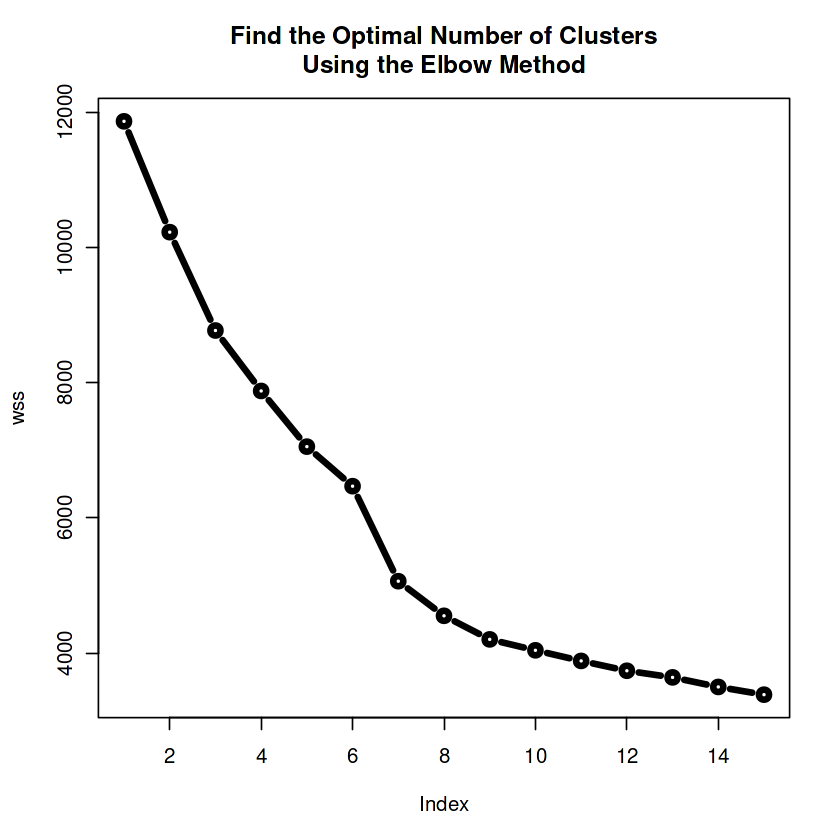

In [10]:
wss <- numeric(15)

for(k in 1:15) {
    wss[k] = sum(kmeans(yeast_df_std,
                       centers = k,
                       nstart = 25,
                       iter.max = 50)$withinss)
}

plot(wss, type = "b", lwd = 4,
    main = "Find the Optimal Number of Clusters\nUsing the Elbow Method")

Warning message:
“did not converge in 10 iterations”

https://stackoverflow.com/questions/69723171/did-not-converge-warning-for-k-means-clustering-in-r

In [11]:
dist_matrix <- dist(yeast_df_std, method = "euclidean")
hc <- hclust(dist_matrix, method = "ward.D2")
yeast_df$ClusterHC <- as.factor(cutree(hc, k = 6))

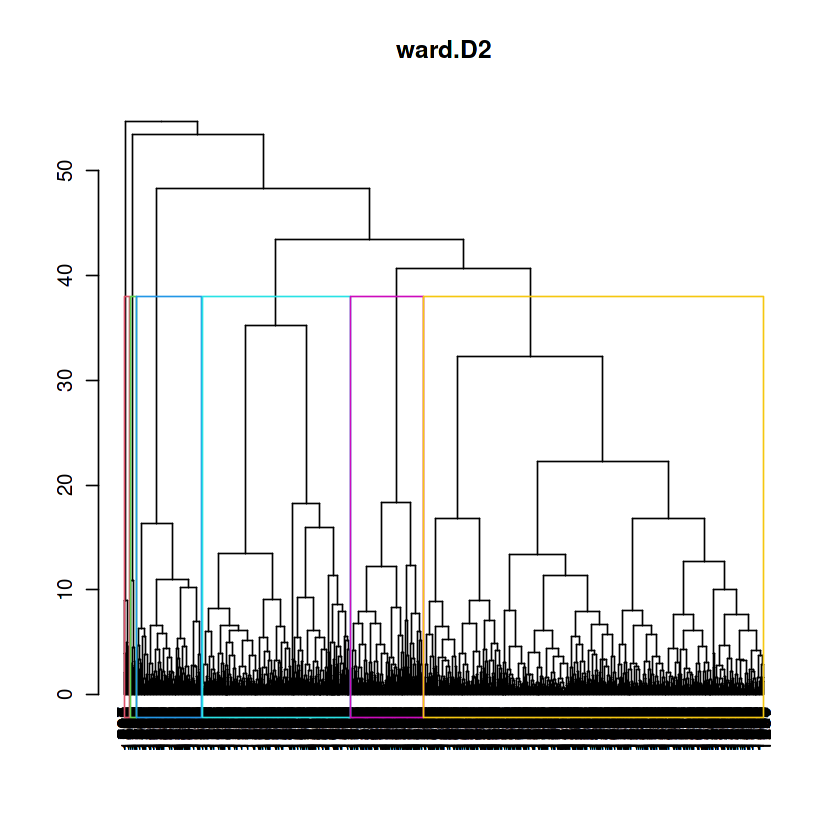

In [12]:
plot(as.dendrogram(hc), main = "ward.D2")
rect.hclust(hc, k = 6, border = 2:8)

In [13]:
yeast_df$ClusterKM <- as.factor(kmeans(yeast_df_std,
                       centers = 6,
                       nstart = 25,
                       iter.max = 50)$cluster)

In [14]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [15]:
pca_result <- princomp(yeast_df_std)

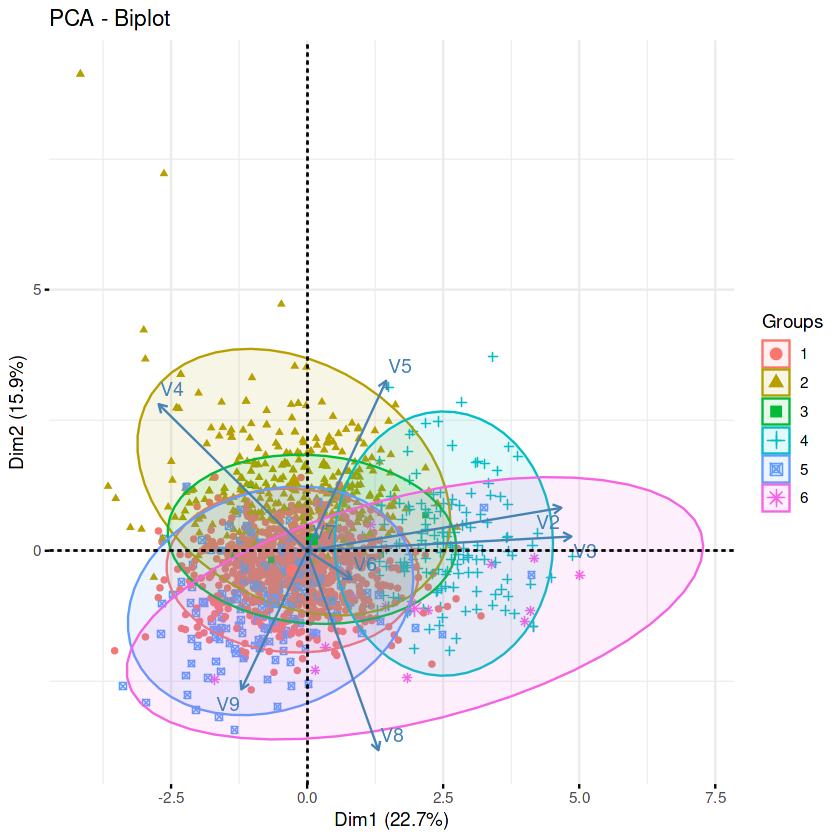

In [16]:
fviz_pca_biplot(
  pca_result,
  geom = "point",
  repel = TRUE,
  habillage = yeast_df$ClusterHC,
  addEllipses = TRUE,
  ellipse.level = 0.95,
  title = "PCA - Biplot"
)

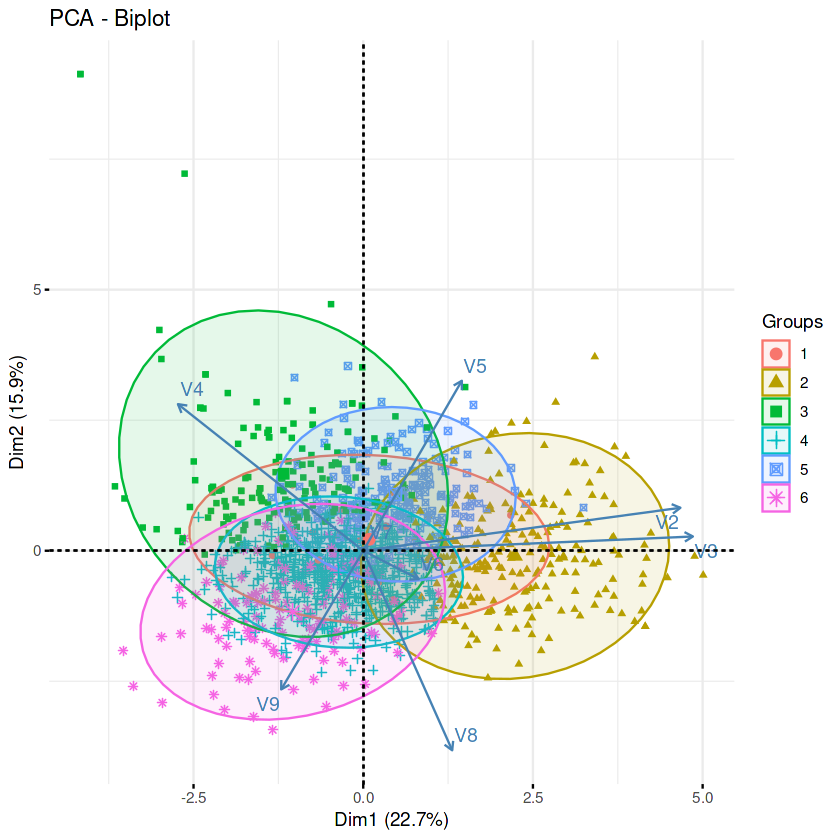

In [17]:
fviz_pca_biplot(
  pca_result,
  geom = "point",
  repel = TRUE,
  habillage = yeast_df$ClusterKM,
  addEllipses = TRUE,
  ellipse.level = 0.95,
  title = "PCA - Biplot"
)

In [18]:
contingency_table <- table(
    HierarchicalClustering = yeast_df$ClusterHC,
    KMeansClustering = yeast_df$ClusterKM
)

contingency_table

                      KMeansClustering
HierarchicalClustering   1   2   3   4   5   6
                     1   0  64  46 660   4  16
                     2   0   2 126  24 193   0
                     3  15   0   0   0   0   0
                     4   0 149   1   1   1   0
                     5   0   6   5  26   3 128
                     6   0  10   0   2   1   1

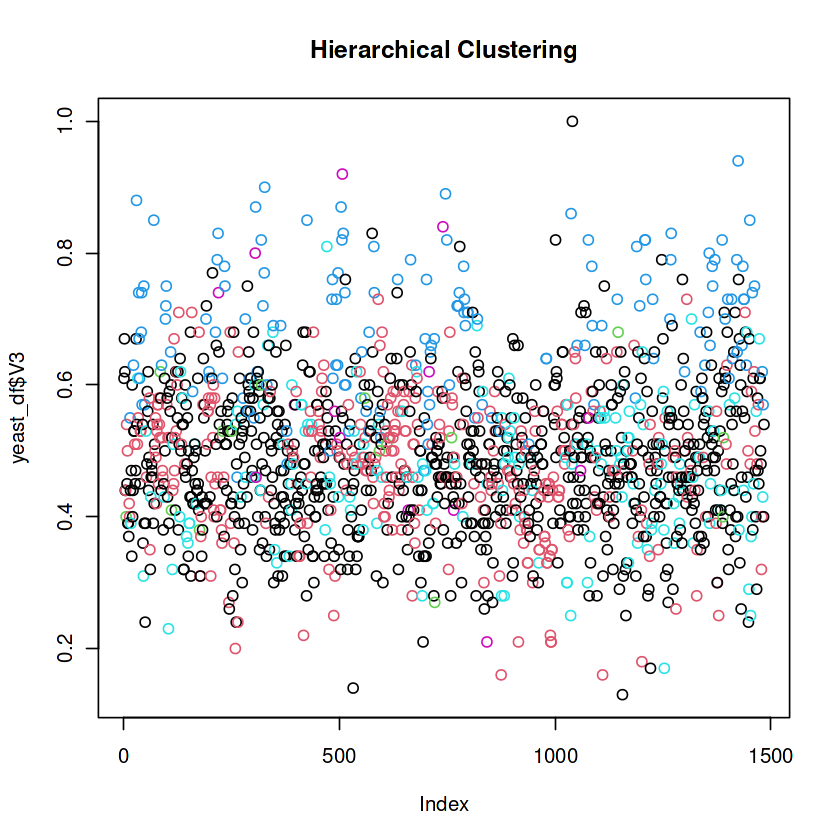

In [19]:
plot(yeast_df$V3, col = as.integer(yeast_df$ClusterHC),
    main = "Hierarchical Clustering")